In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.dates as mdates
import warnings
warnings.filterwarnings('ignore')

In [2]:
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
def format_with_commas(x, pos):
    return f'{int(x):,}'

In [3]:
df = pd.read_csv('SENT_process.csv')

# Display basic information
print("Dataset Overview:")
print(f"Shape: {df.shape}")
print("\nFirst 5 rows:")
df.head()

Dataset Overview:
Shape: (2306, 19)

First 5 rows:


,Date,BRENT Close,BRENT Volume,BRENT Price_Difference,BRENT Volume_Difference,USDX Close,USDX Price_Difference,Daily_Sum_RavenPack,Csum_RavenPack,Daily_Sum_FinBERT,Csum_FinBERT,Daily_Sum_CrudeBERT,Csum_CrudeBERT,Daily_Sum_CrudeBERT_GT,Csum_CrudeBERT_GT,Daily_Sum_CrudeBERT_Plus,Csum_CrudeBERT_Plus,Daily_Sum_CrudeBERT_Plus_GT,Csum_CrudeBERT_Plus_GT
0,2012-01-03,112.129997,1064.0,0.000000,0.0,79.610001,0.000000,0.33,1.89,0.5,-2.0,0.855934,7.790549,30.813617,201.199533,-1.397015,-0.759692,-50.292551,-34.296692
1,2012-01-04,113.699997,1426.0,1.570000,362.0,80.089996,0.479996,-0.06,1.83,1.5,-0.5,-1.420295,6.370254,-52.550907,148.648626,-0.042750,-0.802442,-1.581734,-35.878425
2,2012-01-05,112.739998,687.0,-0.959999,-739.0,80.940002,0.850006,0.49,2.32,2.0,1.5,-1.017875,5.352380,-39.697113,108.951513,-0.085216,-0.887657,-3.323412,-39.201837
3,2012-01-06,113.059998,709.0,0.320000,22.0,81.239998,0.299995,0.51,2.83,0.0,1.5,-0.794918,4.557461,-27.027228,81.924285,0.196705,-0.690952,6.687984,-32.513853
4,2012-01-09,112.449997,595.0,-0.610001,-114.0,81.050003,-0.189995,0.96,3.68,0.5,2.5,0.387390,5.905048,14.333413,120.227210,0.623778,1.018915,23.079775,18.786006


In [4]:
df['Date'] = pd.to_datetime(df['Date'])

# Filter data for the specified date range
filtered_df = df[(df['Date'] >= '2012-01-03') & (df['Date'] <= '2021-04-01')]
print(f"\nFiltered data shape: {filtered_df.shape}")

# Set Date as index
filtered_df = filtered_df.set_index('Date')

# Display summary statistics
print("\nSummary Statistics:")
filtered_df.describe()


Filtered data shape: (2306, 19)

Summary Statistics:


,BRENT Close,BRENT Volume,BRENT Price_Difference,BRENT Volume_Difference,USDX Close,USDX Price_Difference,Daily_Sum_RavenPack,Csum_RavenPack,Daily_Sum_FinBERT,Csum_FinBERT,Daily_Sum_CrudeBERT,Csum_CrudeBERT,Daily_Sum_CrudeBERT_GT,Csum_CrudeBERT_GT,Daily_Sum_CrudeBERT_Plus,Csum_CrudeBERT_Plus,Daily_Sum_CrudeBERT_Plus_GT,Csum_CrudeBERT_Plus_GT
count,2306.000000,2306.000000,2306.000000,2306.000000,2306.000000,2306.000000,2306.000000,2306.000000,2306.000000,2306.000000,2306.000000,2306.000000,2306.000000,2306.000000,2306.000000,2306.000000,2306.000000,2306.000000
mean,71.868161,22405.028621,-0.020499,28.469644,91.315516,0.005776,0.053395,65.730828,-0.834779,-916.805941,-0.063469,-4.839987,-3.911256,-3687.461143,-0.091783,-133.099720,-4.270509,-7297.254844
std,26.524931,15778.842387,1.292620,9657.518509,7.224019,0.386572,0.819614,55.922653,1.323253,679.222187,3.103909,72.215547,118.466534,3177.885007,2.062468,65.395748,79.900639,3236.337959
min,19.330000,0.000000,-10.910000,-58989.000000,78.269997,-2.369995,-2.990000,-11.030000,-9.000000,-2267.000000,-12.493204,-229.994696,-695.714639,-9901.660672,-11.553987,-294.297881,-448.170421,-14033.466069
25%,50.790001,7089.750000,-0.670001,-4091.750000,82.680000,-0.220001,-0.490000,12.152500,-1.500000,-1501.500000,-1.988182,-57.983853,-64.470552,-6107.899729,-1.323813,-187.940321,-44.873750,-9762.788090
50%,63.610001,23528.500000,0.020000,-225.000000,94.045002,0.009995,0.070000,61.395000,-1.000000,-849.750000,-0.018136,5.334258,-0.716397,-3549.824130,-0.101890,-112.538610,-2.532977,-7145.990994
75%,103.147503,33407.250000,0.700001,3008.250000,97.120003,0.220001,0.577500,112.850000,0.000000,-289.500000,1.971113,53.624680,61.157109,-1407.486102,1.116533,-82.777585,36.552599,-4640.845592
max,126.220001,87185.000000,8.799995,70234.000000,103.290001,1.919998,4.080000,186.240000,3.000000,3.000000,14.662200,144.813903,545.970495,3160.340039,8.056292,1.018915,475.321233,18.786006



Missing Values Analysis:
Empty DataFrame
Columns: [Missing Values, Percentage (%)]
Index: []


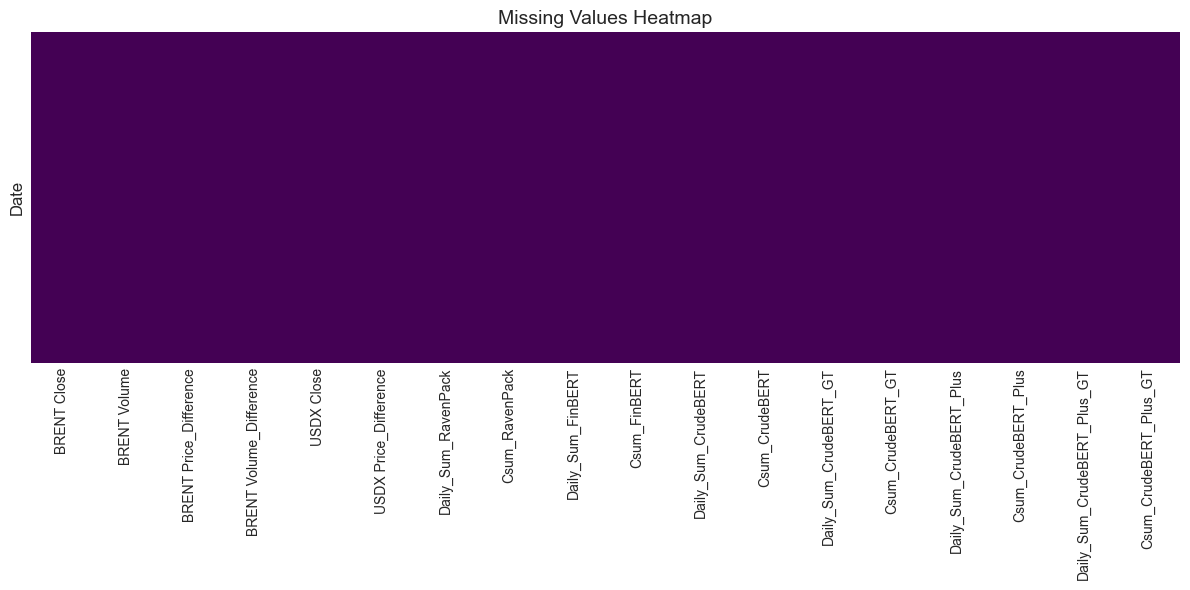


Imputing missing values...
Remaining missing values: 0


In [5]:
# 3. HANDLING MISSING VALUES
missing_values = filtered_df.isnull().sum()
missing_percentage = (missing_values / len(filtered_df)) * 100

print("\nMissing Values Analysis:")
missing_df = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage (%)': missing_percentage
})
print(missing_df[missing_df['Missing Values'] > 0])

# Visualize missing values
plt.figure(figsize=(12, 6))
sns.heatmap(filtered_df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Missing Values Heatmap')
plt.tight_layout()
plt.savefig('missing_values_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

# Impute missing values using forward fill followed by backward fill
# This is suitable for time series data
print("\nImputing missing values...")
filtered_df_imputed = filtered_df.fillna(method='ffill').fillna(method='bfill')

# Verify all missing values are addressed
print(f"Remaining missing values: {filtered_df_imputed.isnull().sum().sum()}")



Analyzing outliers in price columns...


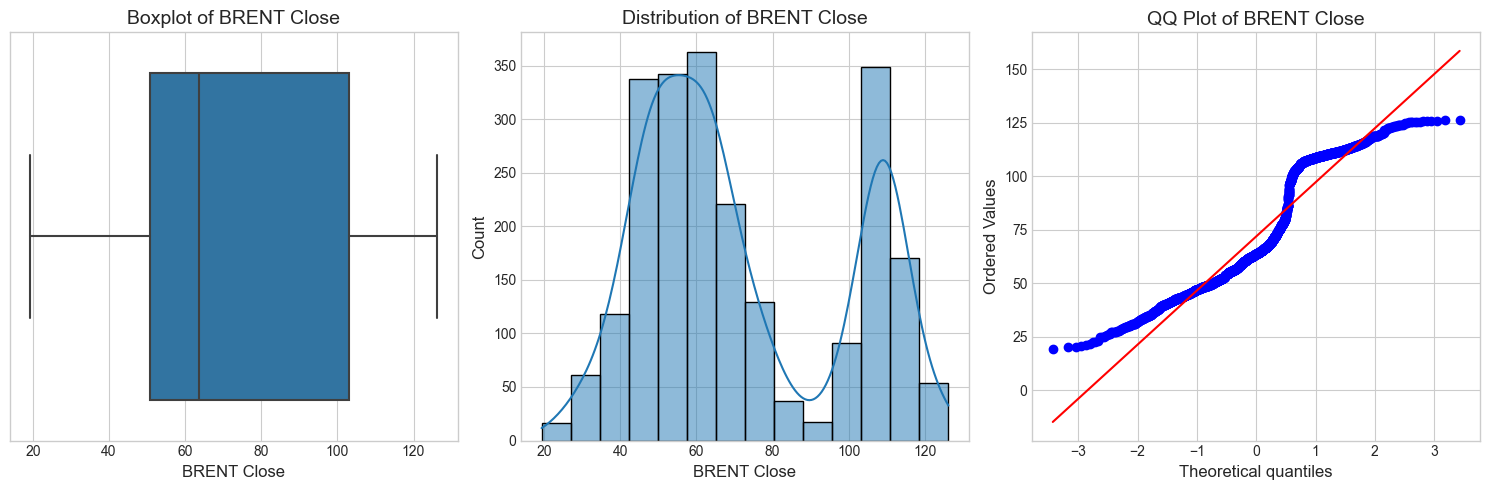


Outlier Analysis for BRENT Close:
Number of outliers (|Z-score| > 3): 0
Percentage of outliers: 0.00%


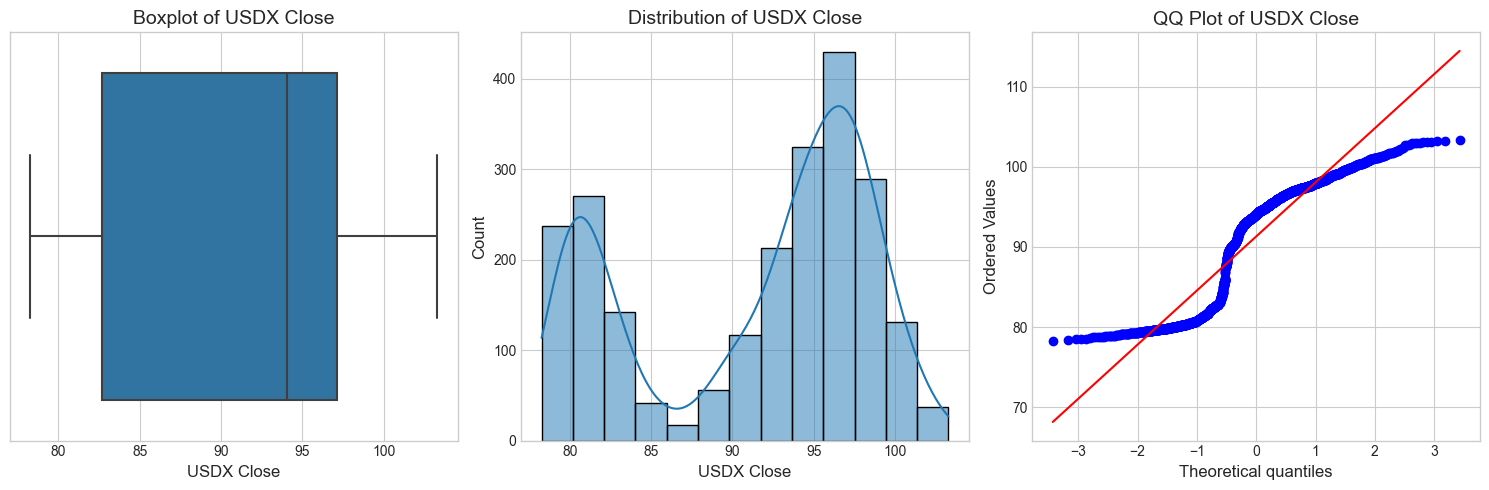


Outlier Analysis for USDX Close:
Number of outliers (|Z-score| > 3): 0
Percentage of outliers: 0.00%

Analyzing outliers in volume columns...


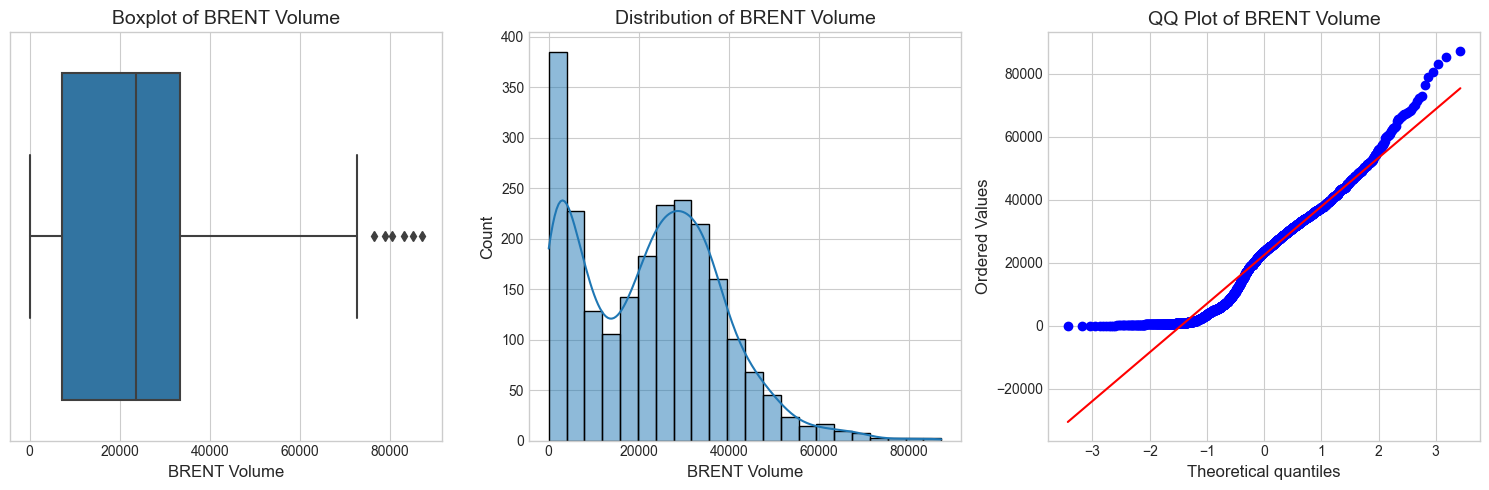


Outlier Analysis for BRENT Volume:
Number of outliers (|Z-score| > 3): 10
Percentage of outliers: 0.43%
Sample outliers:
Date
2016-12-01    71317.0
2017-05-25    72089.0
2019-05-23    80487.0
2019-06-13    72728.0
2019-09-16    69899.0
Name: BRENT Volume, dtype: float64

Analyzing outliers in key sentiment columns...


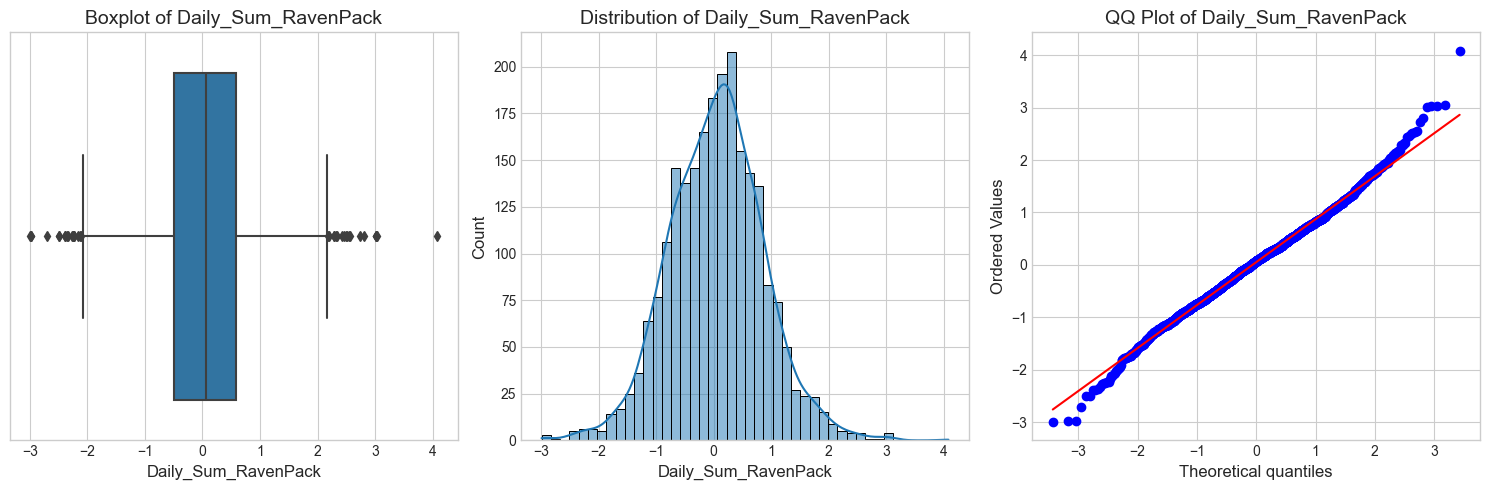


Outlier Analysis for Daily_Sum_RavenPack:
Number of outliers (|Z-score| > 3): 15
Percentage of outliers: 0.65%
Sample outliers:
Date
2012-06-13    3.02
2013-03-25   -2.97
2014-02-12    3.02
2015-06-11   -2.98
2016-06-13    2.81
Name: Daily_Sum_RavenPack, dtype: float64


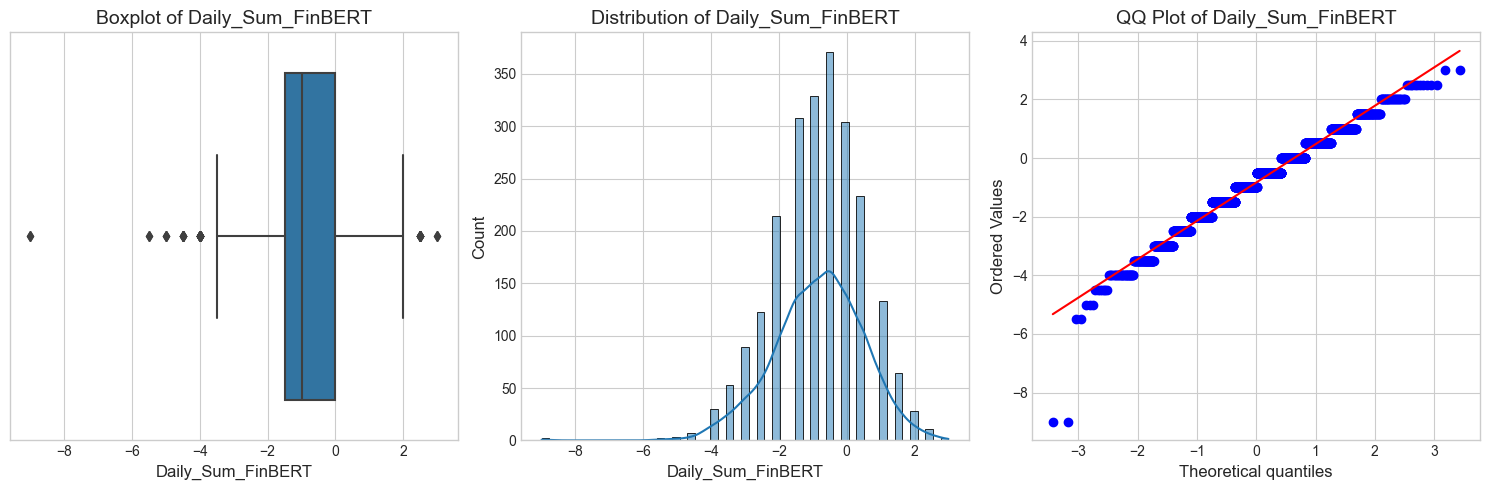


Outlier Analysis for Daily_Sum_FinBERT:
Number of outliers (|Z-score| > 3): 7
Percentage of outliers: 0.30%
Sample outliers:
Date
2012-08-23   -5.5
2012-10-01   -5.0
2013-08-01   -5.0
2015-07-13   -9.0
2018-06-12   -9.0
Name: Daily_Sum_FinBERT, dtype: float64

Handling outliers in selected columns...


In [6]:
# 4. OUTLIER DETECTION
# --------------------

# Function to detect and visualize outliers for a column
def analyze_outliers(df, column):
    plt.figure(figsize=(15, 5))
    
    # Boxplot
    plt.subplot(1, 3, 1)
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
    plt.tight_layout()
    
    # Histogram
    plt.subplot(1, 3, 2)
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
    
    # QQ Plot
    plt.subplot(1, 3, 3)
    stats.probplot(df[column].dropna(), plot=plt)
    plt.title(f'QQ Plot of {column}')
    
    plt.tight_layout()
    plt.savefig(f'outlier_analysis_{column}.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    # Z-score method for outlier detection
    z_scores = stats.zscore(df[column].dropna())
    outliers = df[column][abs(z_scores) > 3]
    
    print(f"\nOutlier Analysis for {column}:")
    print(f"Number of outliers (|Z-score| > 3): {len(outliers)}")
    print(f"Percentage of outliers: {(len(outliers) / len(df)) * 100:.2f}%")
    if len(outliers) > 0:
        print("Sample outliers:")
        print(outliers.head())
    
    return outliers

# Analyze outliers for key columns
price_columns = ['BRENT Close', 'USDX Close']
volume_columns = ['BRENT Volume']
sentiment_columns = [col for col in filtered_df_imputed.columns if 'Daily_Sum' in col]

print("\nAnalyzing outliers in price columns...")
price_outliers = {col: analyze_outliers(filtered_df_imputed, col) for col in price_columns}

print("\nAnalyzing outliers in volume columns...")
volume_outliers = {col: analyze_outliers(filtered_df_imputed, col) for col in volume_columns}

print("\nAnalyzing outliers in key sentiment columns...")
# Analyze just a few key sentiment columns to avoid too many plots
sentiment_outliers = {col: analyze_outliers(filtered_df_imputed, col) for col in sentiment_columns[:2]}

# Decide how to handle outliers - for this analysis, we'll cap outliers at 3 standard deviations
def handle_outliers(df, column):
    mean_val = df[column].mean()
    std_val = df[column].std()
    
    # Cap values at ±3 standard deviations
    lower_bound = mean_val - 3 * std_val
    upper_bound = mean_val + 3 * std_val
    
    # Apply capping
    df[f"{column}_capped"] = df[column].clip(lower=lower_bound, upper=upper_bound)
    
    return df

print("\nHandling outliers in selected columns...")
# Apply outlier handling to key columns with significant outliers
for col in price_columns + volume_columns:
    filtered_df_imputed = handle_outliers(filtered_df_imputed, col)


In [7]:
# 5. NORMALIZATION/SCALING
# ------------------------

# Standardization (z-score normalization)
print("\nApplying standardization...")
scaler = StandardScaler()
cols_to_scale = price_columns + volume_columns + sentiment_columns
scaled_data = scaler.fit_transform(filtered_df_imputed[cols_to_scale])
scaled_df = pd.DataFrame(scaled_data, columns=[f"{col}_scaled" for col in cols_to_scale], index=filtered_df_imputed.index)

# Min-Max scaling (alternative)
print("\nApplying Min-Max scaling...")
minmax_scaler = MinMaxScaler()
minmax_data = minmax_scaler.fit_transform(filtered_df_imputed[cols_to_scale])
minmax_df = pd.DataFrame(minmax_data, columns=[f"{col}_minmax" for col in cols_to_scale], index=filtered_df_imputed.index)

# Combine original and scaled data
analysis_df = pd.concat([filtered_df_imputed, scaled_df, minmax_df], axis=1)


Applying standardization...

Applying Min-Max scaling...



Creating time series plots for prices...


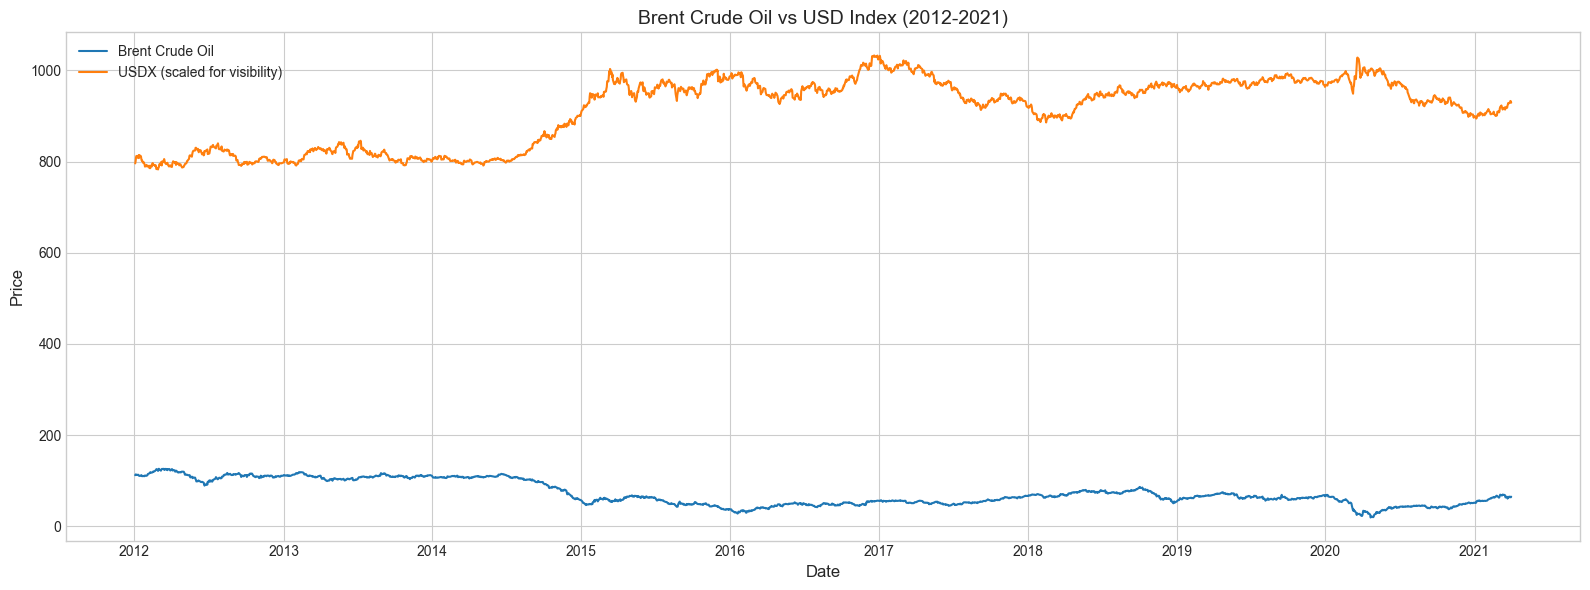


Creating time series plot for Brent volume...


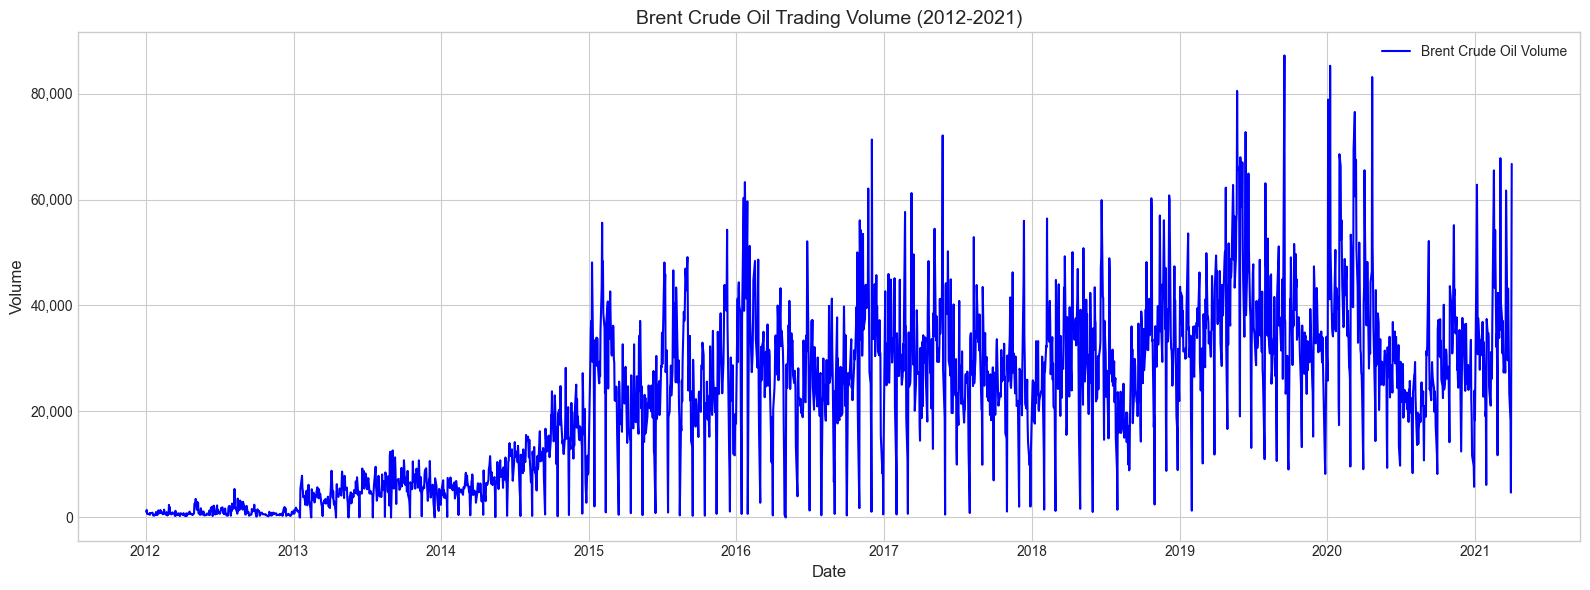


Creating time series plots for sentiment indicators...


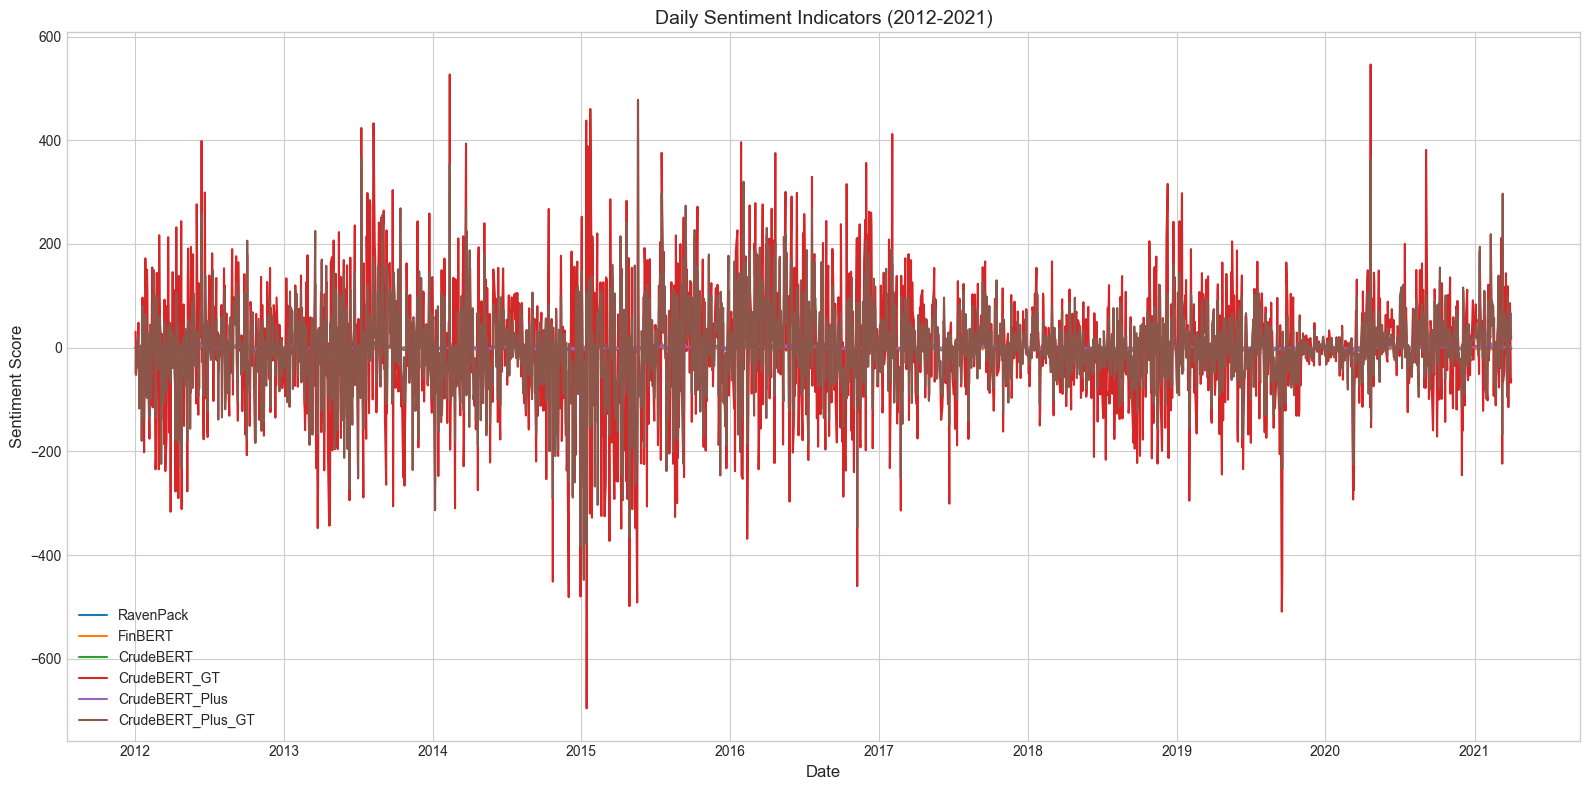

In [8]:
# 6. EXPLORATORY DATA ANALYSIS (EDA)
# ----------------------------------

# Time Series Plots for Price Data
print("\nCreating time series plots for prices...")
plt.figure(figsize=(16, 6))
plt.plot(analysis_df.index, analysis_df['BRENT Close'], label='Brent Crude Oil')
plt.plot(analysis_df.index, analysis_df['USDX Close'] * 10, label='USDX (scaled for visibility)')  # Scale for visibility
plt.title('Brent Crude Oil vs USD Index (2012-2021)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('price_time_series.png', dpi=300, bbox_inches='tight')
plt.show()

# Time Series Plot for Brent Volume Data
print("\nCreating time series plot for Brent volume...")
fig, ax = plt.subplots(figsize=(16, 6))
ax.plot(analysis_df.index, analysis_df['BRENT Volume'], label='Brent Crude Oil Volume', color='blue')
ax.set_title('Brent Crude Oil Trading Volume (2012-2021)')
ax.set_xlabel('Date')
ax.set_ylabel('Volume')
ax.legend()
ax.grid(True)
ax.yaxis.set_major_formatter(plt.FuncFormatter(format_with_commas))
plt.tight_layout()
plt.savefig('brent_volume_time_series.png', dpi=300, bbox_inches='tight')
plt.show()

# Time Series Plots for Sentiment Data
print("\nCreating time series plots for sentiment indicators...")
plt.figure(figsize=(16, 8))
for col in sentiment_columns:
    plt.plot(analysis_df.index, analysis_df[col], label=col.replace('Daily_Sum_', ''))
plt.title('Daily Sentiment Indicators (2012-2021)')
plt.xlabel('Date')
plt.ylabel('Sentiment Score')
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.savefig('sentiment_time_series.png', dpi=300, bbox_inches='tight')
plt.show()



Calculating correlations...


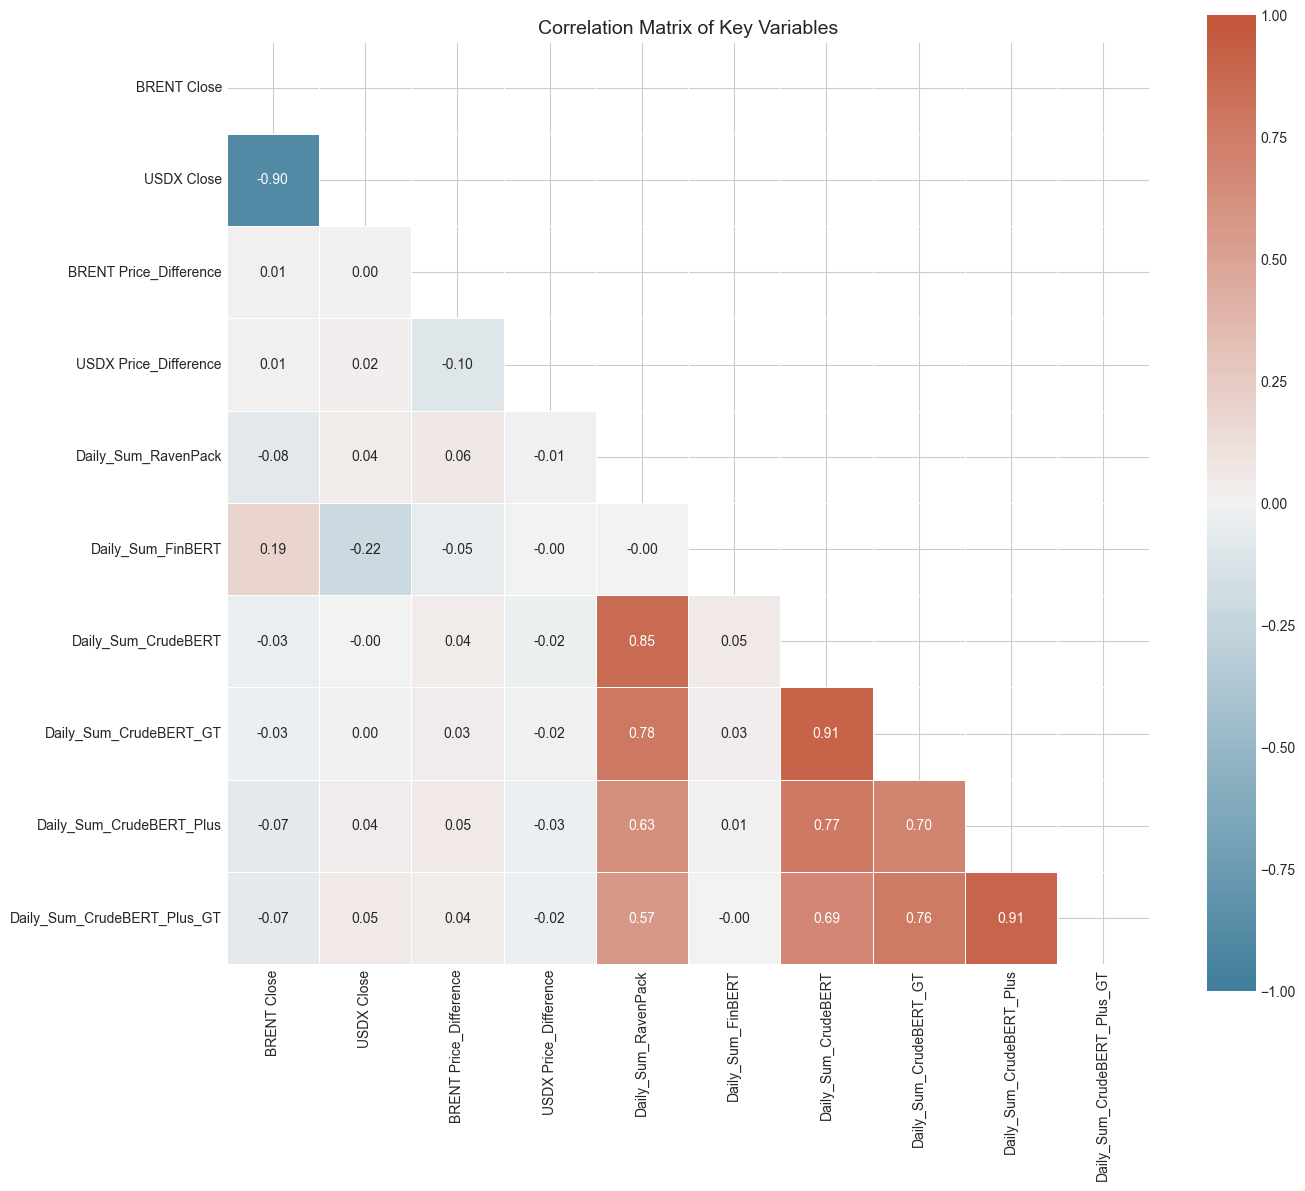

In [9]:
# 7. CORRELATION ANALYSIS
# -----------------------

# Calculate correlations between key variables
print("\nCalculating correlations...")
correlation_cols = price_columns + ['BRENT Price_Difference', 'USDX Price_Difference'] + sentiment_columns
correlation_matrix = analysis_df[correlation_cols].corr()

# Visualize the correlation matrix
plt.figure(figsize=(14, 12))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(correlation_matrix, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
            annot=True, fmt=".2f", square=True, linewidths=.5)
plt.title('Correlation Matrix of Key Variables')
plt.tight_layout()
plt.savefig('correlation_matrix.png', dpi=300, bbox_inches='tight')
plt.show()


Analyzing feature distributions...


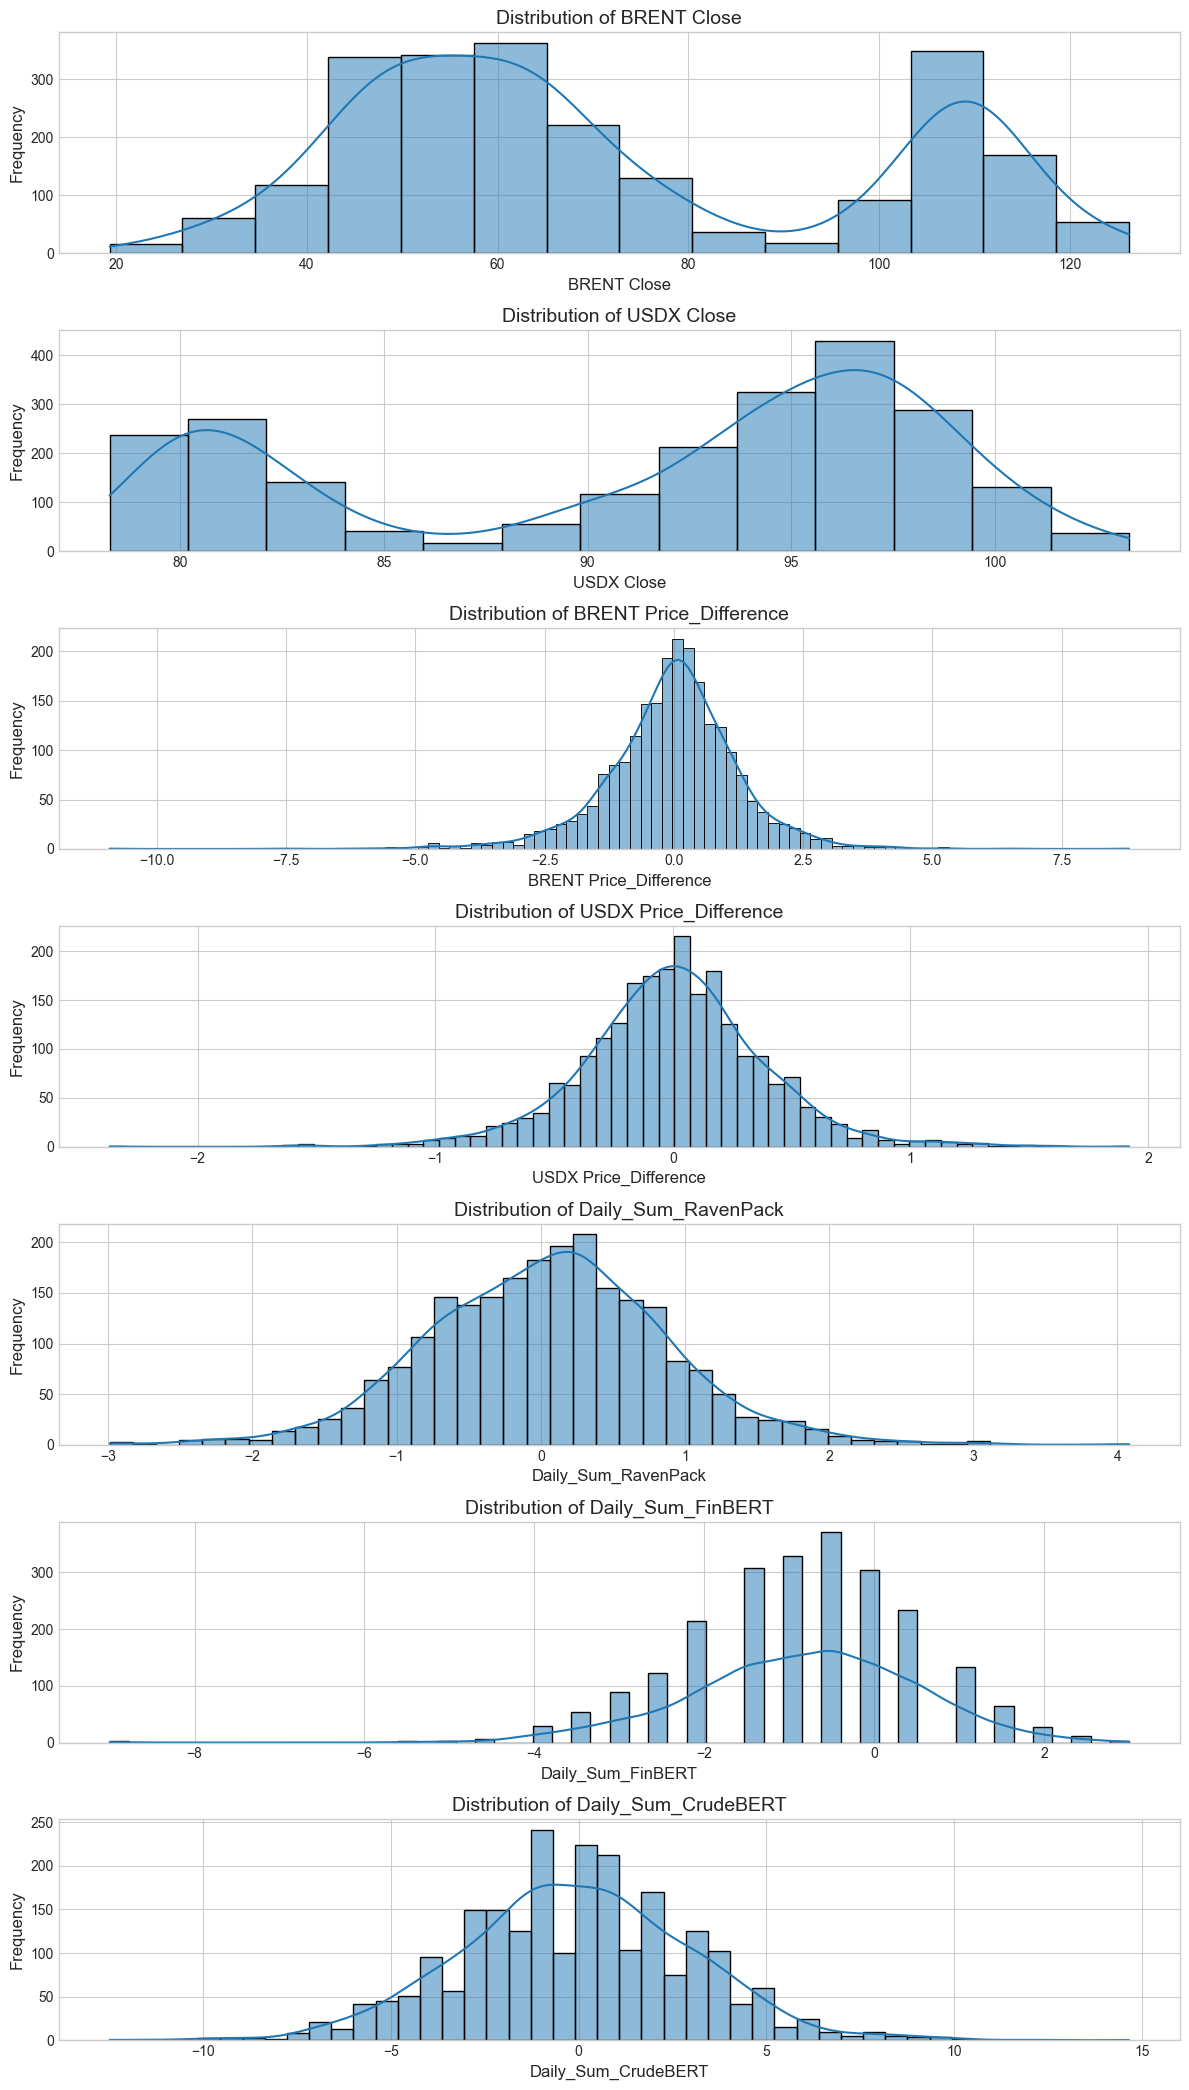

In [10]:
# 8. FEATURE DISTRIBUTIONS
# ------------------------

print("\nAnalyzing feature distributions...")
# Visualize distributions of key features
features_to_plot = price_columns + ['BRENT Price_Difference', 'USDX Price_Difference'] + sentiment_columns[:3]

# Create a grid of histograms
fig, axes = plt.subplots(nrows=len(features_to_plot), figsize=(12, 3*len(features_to_plot)))

for i, feature in enumerate(features_to_plot):
    sns.histplot(analysis_df[feature], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.savefig('feature_distributions.png', dpi=300, bbox_inches='tight')
plt.show()



Applying log transformations to skewed features...


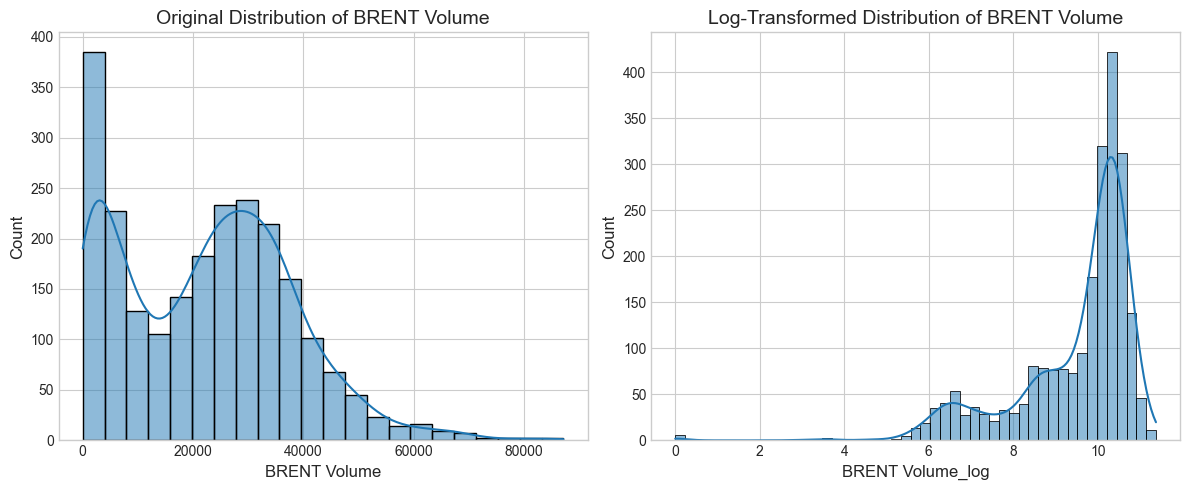

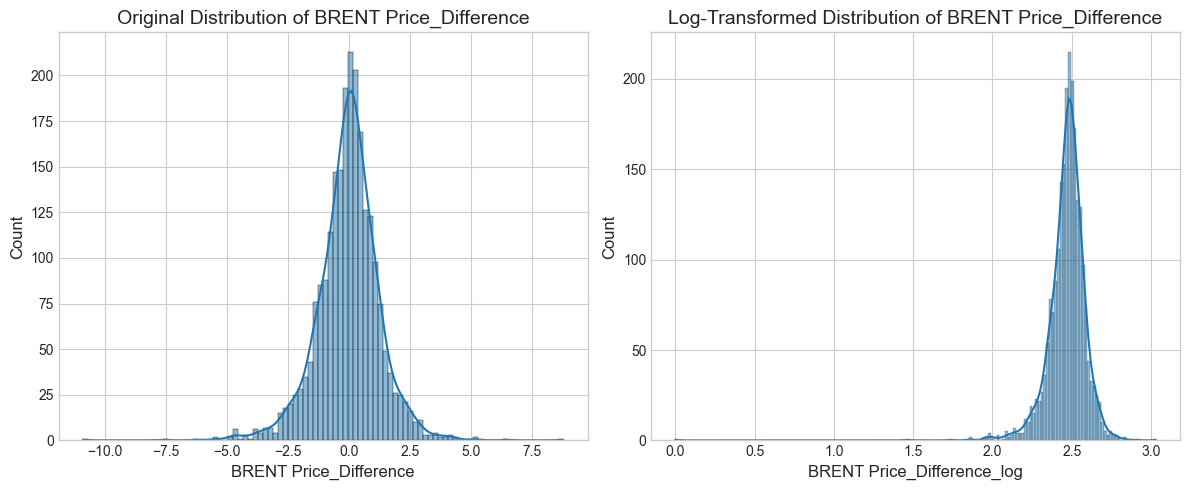

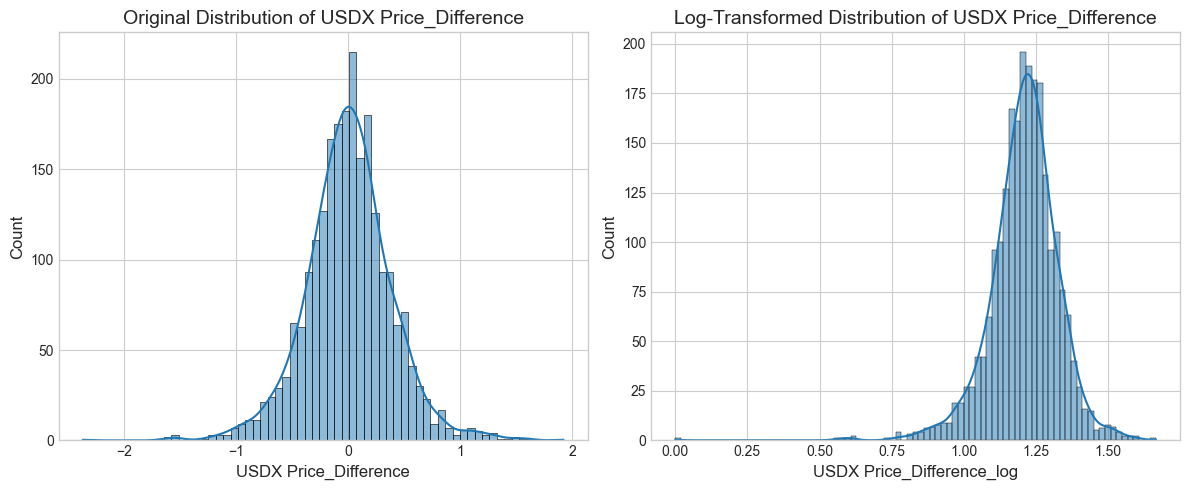

In [11]:
# 9. LOG TRANSFORMATION FOR SKEWED DISTRIBUTIONS
# ---------------------------------------------

print("\nApplying log transformations to skewed features...")
# Apply log transformation to highly skewed features (usually volumes)
log_transform_cols = volume_columns + ['BRENT Price_Difference', 'USDX Price_Difference']

for col in log_transform_cols:
    # Add a small constant to handle zeros or negative values
    min_val = analysis_df[col].min()
    const = 0 if min_val > 0 else abs(min_val) + 1
    
    # Apply log transformation
    analysis_df[f"{col}_log"] = np.log(analysis_df[col] + const)
    
    # Plot original vs log-transformed
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    sns.histplot(analysis_df[col], kde=True)
    plt.title(f'Original Distribution of {col}')
    
    plt.subplot(1, 2, 2)
    sns.histplot(analysis_df[f"{col}_log"], kde=True)
    plt.title(f'Log-Transformed Distribution of {col}')
    
    plt.tight_layout()
    plt.savefig(f'log_transform_{col}.png', dpi=300, bbox_inches='tight')
    plt.show()


In [12]:
# 10. SUMMARY OF FINDINGS
# ----------------------

print("\n=== SUMMARY OF DATA CLEANING AND EDA ===")
print(f"1. Dataset shape after filtering: {filtered_df_imputed.shape}")
print(f"2. Missing values handled using forward fill and backward fill methods")
print(f"3. Outliers detected and capped at ±3 standard deviations")
print(f"4. Key correlations between Brent price and sentiment indicators:")

# Report key correlations
for sentiment in sentiment_columns:
    corr_val = correlation_matrix.loc['BRENT Close', sentiment]
    print(f"   - Correlation between BRENT Close and {sentiment}: {corr_val:.4f}")

print("\n5. Data transformations applied:")
print("   - Standardization (z-score)")
print("   - Min-Max scaling")
print("   - Log transformation for skewed distributions")

print("\nProcessed data is ready for modeling. Key variables to consider based on correlation analysis:")
top_correlated = correlation_matrix['BRENT Close'].drop('BRENT Close').abs().nlargest(5)
print(top_correlated)

# Save the processed dataset for further analysis
analysis_df.to_csv('processed_sentiment_data.csv')
print("\nProcessed data saved to 'processed_sentiment_data.csv'")


=== SUMMARY OF DATA CLEANING AND EDA ===
1. Dataset shape after filtering: (2306, 21)
2. Missing values handled using forward fill and backward fill methods
3. Outliers detected and capped at ±3 standard deviations
4. Key correlations between Brent price and sentiment indicators:
   - Correlation between BRENT Close and Daily_Sum_RavenPack: -0.0829
   - Correlation between BRENT Close and Daily_Sum_FinBERT: 0.1931
   - Correlation between BRENT Close and Daily_Sum_CrudeBERT: -0.0346
   - Correlation between BRENT Close and Daily_Sum_CrudeBERT_GT: -0.0270
   - Correlation between BRENT Close and Daily_Sum_CrudeBERT_Plus: -0.0738
   - Correlation between BRENT Close and Daily_Sum_CrudeBERT_Plus_GT: -0.0743

5. Data transformations applied:
   - Standardization (z-score)
   - Min-Max scaling
   - Log transformation for skewed distributions

Processed data is ready for modeling. Key variables to consider based on correlation analysis:
USDX Close                     0.898257
Daily_Sum_FinB